In [7]:
#import var_code as VC
import numpy as np
import numba as nb
import os
from scipy.interpolate import CubicSpline
import pandas as pd
import BeginnersGraphs as ev
import CuteGraphs as te
import matplotlib.pyplot as plt
from IPython.core.display import Image, display

In [8]:
def delete_csv_files(folder_name):
    te.delete_file(folder_name + "T_dqdt.csv")
    te.delete_file(folder_name + "a_dqdt.csv")
    te.delete_file(folder_name + "b_dqdt.csv")
    te.delete_file(folder_name + "c_dqdt.csv")
    te.delete_file(folder_name + "d_dqdt.csv")

    te.delete_file(folder_name + "T_pn.csv")
    te.delete_file(folder_name + "a_pn.csv")
    te.delete_file(folder_name + "b_pn.csv")
    te.delete_file(folder_name + "c_pn.csv")
    te.delete_file(folder_name + "d_pn.csv")

    te.delete_file(folder_name + "T_np.csv")
    te.delete_file(folder_name + "a_np.csv")
    te.delete_file(folder_name + "b_np.csv")
    te.delete_file(folder_name + "c_np.csv")
    te.delete_file(folder_name + "d_np.csv")

    te.delete_file(folder_name + "T_rhonu.csv")
    te.delete_file(folder_name + "a_rhonu.csv")
    te.delete_file(folder_name + "b_rhonu.csv")
    te.delete_file(folder_name + "c_rhonu.csv")
    te.delete_file(folder_name + "d_rhonu.csv")

In [9]:
def generate_csv(npz_file, folder_name = " ", save = True):
    load_data = np.load(npz_file)

    T = load_data['T']
    Tcm = load_data['Tcm']
    dqdt = load_data['dQdt']
    #dqdt = np.nan_to_num(dQdt, copy=True, nan=0.0, posinf=None, neginf=None)
    
    #plt.figure()
    #plt.plot(T, dqdt)
    #plt.show()
    
    pn = load_data['pn']
    NP = load_data['np']
    rhonu = load_data['rhonu']

    T_reversed = T[::-1]
    Tcm_reversed = Tcm[::-1]
    dqdt_reversed = dqdt[::-1]
    pn_reversed = pn[::-1]
    np_reversed = NP[::-1]
    rhonu_reversed = rhonu[::-1]
    
    T_fit_pn = CubicSpline(np.log(T_reversed[1:]), np.log(pn_reversed[1:])) #cubic spline fit 
    T_fit_np = CubicSpline(np.log(T_reversed), np.log(np_reversed)) #cubic spline fit 
    
    #T_fit_pn = CubicSpline(T_reversed[1:], np.log(pn_reversed[1:])) #cubic spline fit 
    #T_fit_np = CubicSpline(T_reversed, np.log(np_reversed)) #cubic spline fit 
    
    T_fit_dqdt = CubicSpline(T_reversed[:-1], dqdt_reversed[:-1]) #cubic spline fit 
    #T_fit_pn = CubicSpline(T_reversed, pn_reversed) #cubic spline fit 
    #T_fit_np = CubicSpline(T_reversed, np_reversed) #cubic spline fit 
    Tcm_fit_rhonu = CubicSpline(Tcm_reversed, rhonu_reversed) #cubic spline fit 
    
    #determine coefficients
    d_dqdt = T_fit_dqdt(T)
    c_dqdt = T_fit_dqdt(T,1)
    b_dqdt = T_fit_dqdt(T,2)*.5
    a_dqdt = T_fit_dqdt(T,3)*(1/6)
            
    d_pn = T_fit_pn(T)
    c_pn = T_fit_pn(T,1)
    b_pn = T_fit_pn(T,2)*.5
    a_pn = T_fit_pn(T,3)*(1/6)

    d_np = T_fit_np(T)
    c_np = T_fit_np(T,1)
    b_np = T_fit_np(T,2)*.5
    a_np = T_fit_np(T,3)*(1/6)

    d_rhonu = Tcm_fit_rhonu(Tcm)
    c_rhonu = Tcm_fit_rhonu(Tcm,1)
    b_rhonu = Tcm_fit_rhonu(Tcm,2)*.5
    a_rhonu = Tcm_fit_rhonu(Tcm,3)*(1/6)
    
    try:
        os.mkdir(folder_name)
    except OSError as e:
        print("Directory exists")
        
    delete_csv_files(folder_name)
    
    T_dqdt_csv = pd.DataFrame(T).to_csv(folder_name + 'T_dqdt.csv')
    a_dqdt_csv = pd.DataFrame(a_dqdt).to_csv(folder_name + 'a_dqdt.csv')
    b_dqdt_csv = pd.DataFrame(b_dqdt).to_csv(folder_name + 'b_dqdt.csv')
    c_dqdt_csv = pd.DataFrame(c_dqdt).to_csv(folder_name + 'c_dqdt.csv')
    d_dqdt_csv = pd.DataFrame(d_dqdt).to_csv(folder_name + 'd_dqdt.csv')

    T_pn_csv = pd.DataFrame(T).to_csv(folder_name + 'T_pn.csv')
    a_pn_csv = pd.DataFrame(a_pn).to_csv(folder_name + 'a_pn.csv')
    b_pn_csv = pd.DataFrame(b_pn).to_csv(folder_name + 'b_pn.csv')
    c_pn_csv = pd.DataFrame(c_pn).to_csv(folder_name + 'c_pn.csv')
    d_pn_csv = pd.DataFrame(d_pn).to_csv(folder_name + 'd_pn.csv')

    T_np_csv = pd.DataFrame(T).to_csv(folder_name + 'T_np.csv')
    a_np_csv = pd.DataFrame(a_np).to_csv(folder_name + 'a_np.csv')
    b_np_csv = pd.DataFrame(b_np).to_csv(folder_name + 'b_np.csv')
    c_np_csv = pd.DataFrame(c_np).to_csv(folder_name + 'c_np.csv')
    d_np_csv = pd.DataFrame(d_np).to_csv(folder_name + 'd_np.csv')

    Tcm_rhonu_csv = pd.DataFrame(Tcm).to_csv(folder_name + 'T_rhonu.csv')
    a_rhonu_csv = pd.DataFrame(a_rhonu).to_csv(folder_name + 'a_rhonu.csv')
    b_rhonu_csv = pd.DataFrame(b_rhonu).to_csv(folder_name + 'b_rhonu.csv')
    c_rhonu_csv = pd.DataFrame(c_rhonu).to_csv(folder_name + 'c_rhonu.csv')
    d_rhonu_csv = pd.DataFrame(d_rhonu).to_csv(folder_name + 'd_rhonu.csv')
    
    if save == True:
        np.savez(folder_name + "csvFiles.npz", *[T, Tcm, a_dqdt, b_dqdt, c_dqdt, d_dqdt, a_pn, b_pn, c_pn, d_pn, a_np, b_np, c_np, d_np, a_rhonu, b_rhonu, c_rhonu, d_rhonu])
    
    return folder_name

In [10]:
folder = generate_csv('newer_movie_arrays.npz', folder_name = "CSVFiles/", save = True)
#print(folder)

Directory exists


In [11]:
#CSV_Files is Hannah's files
ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_vs.c')
te.delete_file("evolution_vs.out")


make: Circular alter_vs.c <- alter_vs.c dependency dropped.



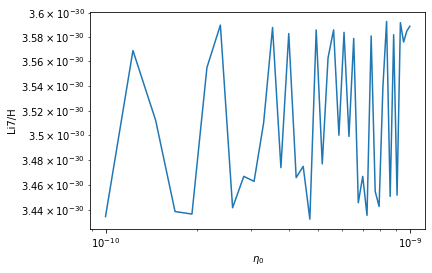

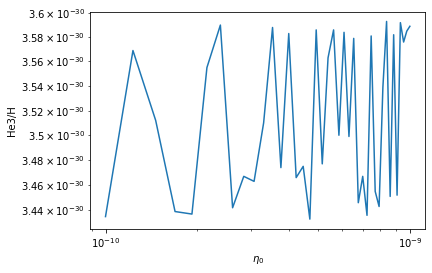

In [12]:
ev.output_plots_alter_vs(1e-10, 10e-10, 40, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x', '14.87365053664758', '255', '104.56255360706342', '300', '7e-05')
plt.show()

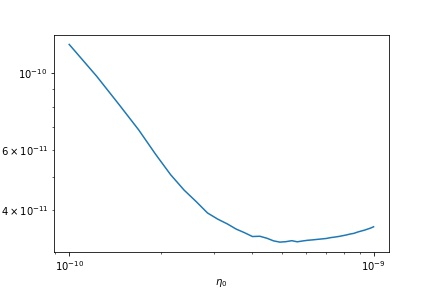

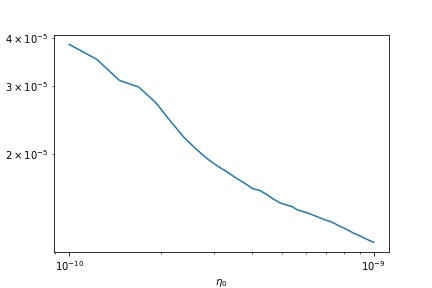

In [25]:
display(Image('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/Li7.jpg'))
display(Image('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/He3.jpg'))

there is a file!
there is a file!
there is a file!


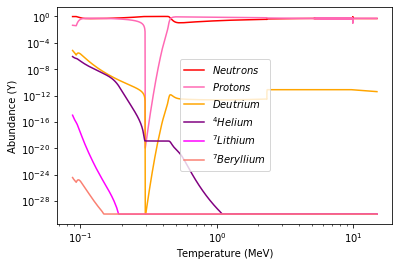

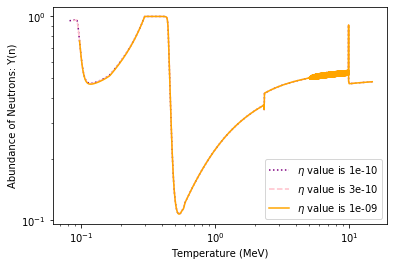

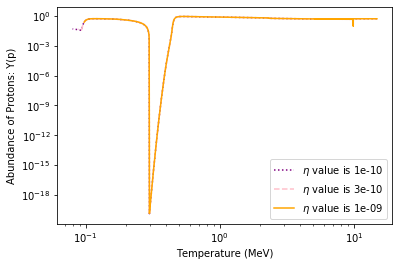

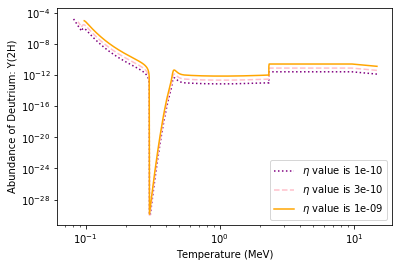

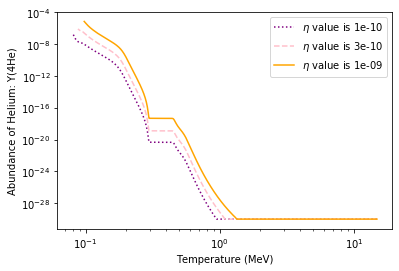

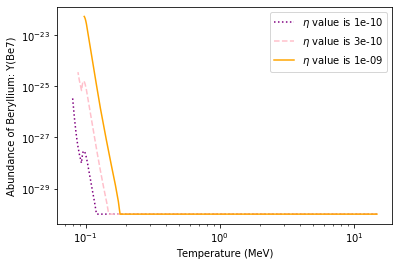

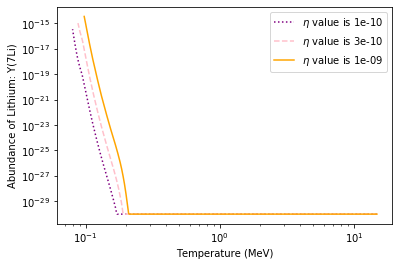

In [26]:
temperature_str_high, temperature_nu_str_high, dqdt_str_high, rhonu_str_high, Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high, np_str_high, pn_str_high = te.eta_element_string_vs(10e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x', '14.87365053664758')

temperature_str_med, temperature_nu_str_med, dqdt_str_med, rhonu_str_med, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med, np_str_med, pn_str_med = te.eta_element_string_vs(3e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x', '14.87365053664758')

temperature_str_low, temperature_nu_str_low, dqdt_str_low, rhonu_str_low, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low, np_str_low, pn_str_low = te.eta_element_string_vs(1e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_vs.x', '14.87365053664758')

te.generate_plots_eta_element_temp(temperature_str_high, Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high, temperature_str_med, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med, temperature_str_low, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low)


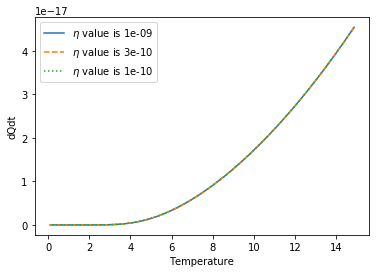

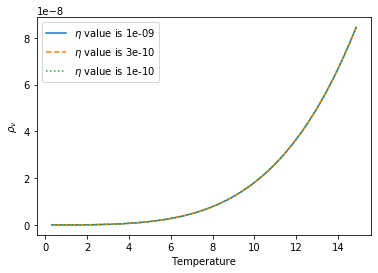

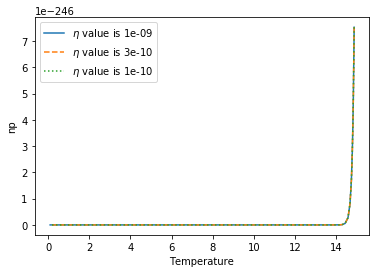

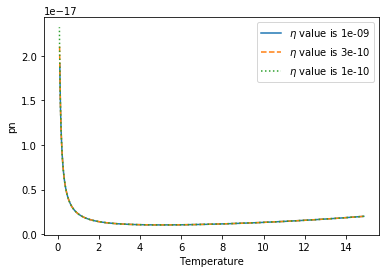

In [27]:
plt.figure()
plt.plot(temperature_str_high, dqdt_str_high, label = '$\eta$ value is {}'.format(eta_value_high))
plt.plot(temperature_str_med, dqdt_str_med, label = '$\eta$ value is {}'.format(eta_value_med), linestyle = "--")
plt.plot(temperature_str_low, dqdt_str_low, label = '$\eta$ value is {}'.format(eta_value_low), linestyle = ":")
plt.ylabel("dQdt")
plt.xlabel("Temperature")
#plt.title("Hannah files")
plt.legend()
#plt.savefig('dqdt.jpg')
plt.show()

plt.figure()
plt.plot(temperature_nu_str_high, rhonu_str_high, label = '$\eta$ value is {}'.format(eta_value_high))
plt.plot(temperature_nu_str_med, rhonu_str_med, label = '$\eta$ value is {}'.format(eta_value_med), linestyle = "--")
plt.plot(temperature_nu_str_low, rhonu_str_low, label = '$\eta$ value is {}'.format(eta_value_low), linestyle = ":")
plt.ylabel(''r'$\rho_{\nu}$')
plt.xlabel("Temperature")
#plt.title("Hannah files")
plt.legend()
#plt.savefig('rhonu.jpg')
plt.show()

t_h_pn = te.GK_to_MeV(temperature_str_high)*(10**-3)
t_m_pn = te.GK_to_MeV(temperature_str_med)*(10**-3)
t_l_pn = te.GK_to_MeV(temperature_str_low)*(10**-3)

plt.figure()
plt.plot(temperature_str_high, np_str_high, label = '$\eta$ value is {}'.format(eta_value_high))
plt.plot(temperature_str_med, np_str_med, label = '$\eta$ value is {}'.format(eta_value_med), linestyle = "--")
plt.plot(temperature_str_low, np_str_low, label = '$\eta$ value is {}'.format(eta_value_low), linestyle = ":")
plt.ylabel("np")
plt.xlabel("Temperature")
#plt.title("Hannah files")
plt.legend()
#plt.savefig('np.jpg')
plt.show()

plt.figure()
plt.plot(temperature_str_high, pn_str_high, label = '$\eta$ value is {}'.format(eta_value_high))
plt.plot(temperature_str_med, pn_str_med, label = '$\eta$ value is {}'.format(eta_value_med), linestyle = "--")
plt.plot(temperature_str_low, pn_str_low, label = '$\eta$ value is {}'.format(eta_value_low), linestyle = ":")
plt.ylabel('pn')
plt.xlabel("Temperature")
#plt.title("Hannah files")
plt.legend()
#plt.savefig('pn.jpg')
plt.show()

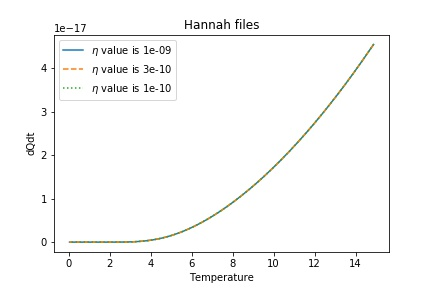

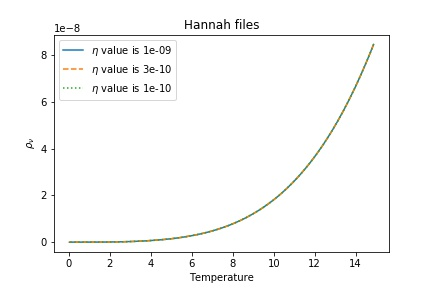

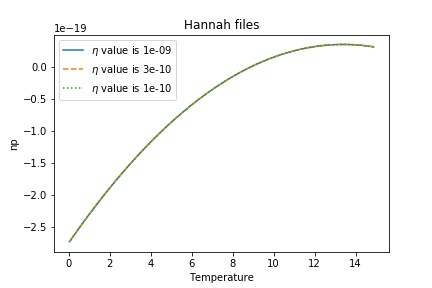

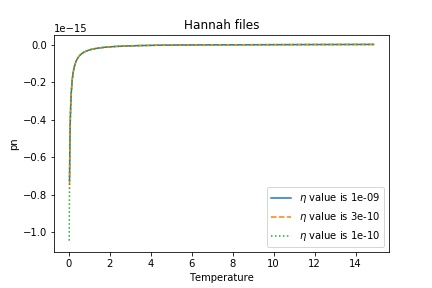

In [28]:
display(Image('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/dqdt.jpg'))
display(Image('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/rhonu.jpg'))
display(Image('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/np.jpg'))
display(Image('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/pn.jpg'))

In [ ]:
x_n_eq_h, x_p_eq_h, x_2H_eq_h, x_4He_eq_h, x_7Li_eq_h, x_7Be_eq_h, ratio_n_high, ratio_p_high, ratio_2H_high, ratio_4He_high, ratio_7Li_high, ratio_Be7_high  = te.thermo_equal_strings(temperature_str_high, Y_p_str_high, Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high)

x_n_eq_m, x_p_eq_m, x_2H_eq_m, x_4He_eq_m, x_7Li_eq_m, x_7Be_eq_m, ratio_n_med, ratio_p_med, ratio_2H_med, ratio_4He_med, ratio_7Li_med, ratio_Be7_med  = te.thermo_equal_strings(temperature_str_med, Y_p_str_med, Y_n_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med)

x_n_eq_L, x_p_eq_L, x_2H_eq_L, x_4He_eq_L, x_7Li_eq_L, x_7Be_eq_L, ratio_n_low, ratio_p_low, ratio_2H_low, ratio_4He_low, ratio_7Li_low, ratio_Be7_low  = te.thermo_equal_strings(temperature_str_low, Y_p_str_low, Y_n_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low)

te.generate_thermo_equal_plots(Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, temperature_str_high, temperature_str_med, temperature_str_low, x_n_eq_h, x_p_eq_h, x_2H_eq_h, x_4He_eq_h, x_7Li_eq_h, x_7Be_eq_h, x_n_eq_m, x_p_eq_m, x_2H_eq_m, x_4He_eq_m, x_7Li_eq_m, x_7Be_eq_m, x_n_eq_L, x_p_eq_L, x_2H_eq_L, x_4He_eq_L, x_7Li_eq_L, x_7Be_eq_L)

In [ ]:
te.ratio_plots(temperature_str_high, temperature_str_med, temperature_str_low, ratio_n_high, ratio_p_high, ratio_2H_high, ratio_4He_high, ratio_7Li_high, ratio_Be7_high,  ratio_n_med, ratio_p_med, ratio_2H_med, ratio_4He_med, ratio_7Li_med, ratio_Be7_med, ratio_n_low, ratio_p_low, ratio_2H_low, ratio_4He_low, ratio_7Li_low, ratio_Be7_low)

In [ ]:
y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m = te.mass_frac_str(Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_n_str_med, Y_2H_str_med, Y_4He_str_med)
te.CompareHighMedMassFrac_seperate_plots(temperature_str_high, temperature_str_med, y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m)
te.CompareHighMedMassFrac(temperature_str_high, temperature_str_med, y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m)

In [ ]:
te.Li_Be_seperate_plots(temperature_str_high, temperature_str_med, temperature_str_low, Y_7Li_str_high, Y_7Li_str_med, Y_7Li_str_low, Y_Be7_str_high, Y_Be7_str_med, Y_Be7_str_low)
te.Li_Be(temperature_str_high, temperature_str_med, temperature_str_low, Y_7Li_str_high, Y_7Li_str_med, Y_7Li_str_low, Y_Be7_str_high, Y_Be7_str_med, Y_Be7_str_low)

In [ ]:
te.delete_file("evolution_vs.out")
delete_csv_files(folder)

## alter_eta_edit

In [ ]:
ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_eta_edit.c')

In [ ]:
%time
ev.output_plots_alter_eta(1e-10, 10e-10, 40, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')

In [ ]:
ev.clean_directory('C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2', 'alter_eta_edit.c')
te.delete_file("evolution.out") 

In [ ]:
temperature_str_high, Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high = te.eta_element_string_e(10e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')

temperature_str_med, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med = te.eta_element_string_e(3e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')

temperature_str_low, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low = te.eta_element_string_e(1e-10, 'C:/Users/kathr/Chad_Research_Neutrinos/alterbbn_v2.2/alter_eta_edit.x')

te.generate_plots_eta_element_temp(temperature_str_high, Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high, temperature_str_med, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med, temperature_str_low, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low)

%time

In [ ]:
te.delete_file("evolution.out")

In [ ]:
x_n_eq_h, x_p_eq_h, x_2H_eq_h, x_4He_eq_h, x_7Li_eq_h, x_7Be_eq_h, ratio_n_high, ratio_p_high, ratio_2H_high, ratio_4He_high, ratio_7Li_high, ratio_Be7_high  = te.thermo_equal_strings(temperature_str_high, Y_p_str_high, Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high)

x_n_eq_m, x_p_eq_m, x_2H_eq_m, x_4He_eq_m, x_7Li_eq_m, x_7Be_eq_m, ratio_n_med, ratio_p_med, ratio_2H_med, ratio_4He_med, ratio_7Li_med, ratio_Be7_med  = te.thermo_equal_strings(temperature_str_med, Y_p_str_med, Y_n_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med)

x_n_eq_L, x_p_eq_L, x_2H_eq_L, x_4He_eq_L, x_7Li_eq_L, x_7Be_eq_L, ratio_n_low, ratio_p_low, ratio_2H_low, ratio_4He_low, ratio_7Li_low, ratio_Be7_low  = te.thermo_equal_strings(temperature_str_low, Y_p_str_low, Y_n_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, eta_value_low)

te.generate_thermo_equal_plots(Y_n_str_high, Y_p_str_high, Y_2H_str_high, Y_4He_str_high, Y_7Li_str_high, Y_Be7_str_high, eta_value_high, Y_n_str_med, Y_p_str_med, Y_2H_str_med, Y_4He_str_med, Y_7Li_str_med, Y_Be7_str_med, eta_value_med, Y_n_str_low, Y_p_str_low, Y_2H_str_low, Y_4He_str_low, Y_7Li_str_low, Y_Be7_str_low, temperature_str_high, temperature_str_med, temperature_str_low, x_n_eq_h, x_p_eq_h, x_2H_eq_h, x_4He_eq_h, x_7Li_eq_h, x_7Be_eq_h, x_n_eq_m, x_p_eq_m, x_2H_eq_m, x_4He_eq_m, x_7Li_eq_m, x_7Be_eq_m, x_n_eq_L, x_p_eq_L, x_2H_eq_L, x_4He_eq_L, x_7Li_eq_L, x_7Be_eq_L)

In [ ]:
te.ratio_plots(temperature_str_high, temperature_str_med, temperature_str_low, ratio_n_high, ratio_p_high, ratio_2H_high, ratio_4He_high, ratio_7Li_high, ratio_Be7_high,  ratio_n_med, ratio_p_med, ratio_2H_med, ratio_4He_med, ratio_7Li_med, ratio_Be7_med, ratio_n_low, ratio_p_low, ratio_2H_low, ratio_4He_low, ratio_7Li_low, ratio_Be7_low)

In [ ]:
y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m = te.mass_frac_str(Y_n_str_high, Y_2H_str_high, Y_4He_str_high, Y_n_str_med, Y_2H_str_med, Y_4He_str_med)

In [ ]:
te.CompareHighMedMassFrac_seperate_plots(temperature_str_high, temperature_str_med, y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m)
te.CompareHighMedMassFrac(temperature_str_high, temperature_str_med, y_n_h, y_2h_h, y_50_2h_h, y_4he_h, y_n_m, y_2h_m, y_50_2h_m, y_4he_m)

In [ ]:
te.Li_Be_seperate_plots(temperature_str_high, temperature_str_med, temperature_str_low, Y_7Li_str_high, Y_7Li_str_med, Y_7Li_str_low, Y_Be7_str_high, Y_Be7_str_med, Y_Be7_str_low)
te.Li_Be(temperature_str_high, temperature_str_med, temperature_str_low, Y_7Li_str_high, Y_7Li_str_med, Y_7Li_str_low, Y_Be7_str_high, Y_Be7_str_med, Y_Be7_str_low)

In [ ]:
delete_csv_files(folder)